## First, let's install RelaxiFI (only need to run this once)
- Make sure you replace the path (C:/Users/charl/Documents/Python%20dev/RelaxiFI) with the path of the folder where you downloaded RelaxiFI

In [1]:
#%pip install -e "C:/Users/charl/Documents/Python dev/RelaxiFI"
# %pip install CoolProp

## Next import the package

In [2]:
import RelaxiFI as relax
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
## Example: find the pressure at 5 km depth

target_depth = 5  
config=relax.config_crustalmodel(crust_dens_kgm3=2750)
tolerance = 0.001  # how close you want to be

# run it
pressure = relax.find_P_for_kmdepth(target_depth=5, config=config, tolerance=tolerance)
print("Pressure:", pressure)


Pressure: [1.3488749999999998]


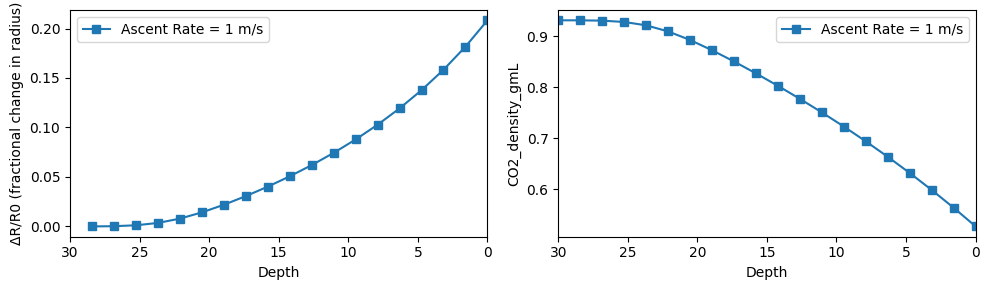

,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3,Depth(km)
0,0.000000,0,0.000000,809.325000,809.325000,0.000000e+00,1.000000,1000.0,NaN,0.930837,30.000000
1,1578.947368,1,1578.947368,766.728947,809.226956,1.163351e-14,1.000018,1000.0,0.000018,0.930786,28.421053
2,3157.894737,2,1578.947368,724.132895,808.044271,1.404839e-13,1.000240,1000.0,0.000240,0.930167,26.842105
3,4736.842105,3,1578.947368,681.536842,803.138409,5.857390e-13,1.001165,1000.0,0.001165,0.927591,25.263158
4,6315.789474,4,1578.947368,638.940789,790.766612,1.499037e-12,1.003532,1000.0,0.003532,0.921043,23.684211
5,7894.736842,5,1578.947368,596.344737,768.654713,2.760638e-12,1.007891,1000.0,0.007891,0.909145,22.105263
6,9473.684211,6,1578.947368,553.748684,738.266999,3.976694e-12,1.014170,1000.0,0.014170,0.892363,20.526316
7,11052.631579,7,1578.947368,511.152632,703.179551,4.882372e-12,1.021879,1000.0,0.021879,0.872319,18.947368
8,12631.578947,8,1578.947368,468.556579,666.169342,5.531013e-12,1.030612,1000.0,0.030612,0.850331,17.368421
9,14210.526316,9,1578.947368,425.960526,628.609364,6.071874e-12,1.040199,1000.0,0.040199,0.827035,15.789474


In [4]:
## Let's set the initial conditions
T = 1400 + 273.15  # Temperature in Kelvin

# Radius in m and ascent rate in m/s
R0 = 1 * 10**-6  # Initial value of R (radius of the FI in m)
b=1000*R0 # distance to the crystal edge, Wanamaker uses R0/b=1/1000
ascent_rate_ms=1 #m/s

depth_path_ini_fin_step=[30,0,20] #This defines the starting depth, ending depth and the number of steps in the path. More steps is better, especially for slow ascent rates.

crustal_model_config=relax.config_crustalmodel(crust_dens_kgm3=2750)#the configuration of your crustal model

EOS='SW96' # Equation of state for CO2 (SW96 or SP94)
plotfig=True # Whether to plot the figure or not

resultsSW96 = relax.stretch_in_ascent(R=R0, b=b,T=T,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS=EOS,plotfig=plotfig,update_b=False,report_results='fullpath')

resultsSW96

## Example, Fig 8 from Wanamaker and Evans 1989

,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3,Depth(km)
0,0.000000e+00,0,0.000000,809.325000,809.325000,0.000000e+00,1.000000,1000.0,NaN,0.927473,30.000000
1,1.578947e+05,1,157894.736842,766.728947,799.782645,1.163351e-14,1.001837,1000.0,0.001837,0.922381,28.421053
2,3.157895e+05,2,157894.736842,724.132895,729.780142,9.214945e-14,1.016387,1000.0,0.016387,0.883333,26.842105
3,4.736842e+05,3,157894.736842,681.536842,716.817777,1.851318e-14,1.019310,1000.0,0.019310,0.875755,25.263158
4,6.315789e+05,4,157894.736842,638.940789,649.894363,1.040974e-13,1.035746,1000.0,0.035746,0.834720,23.684211
5,7.894737e+05,5,157894.736842,596.344737,633.767595,2.747294e-14,1.040084,1000.0,0.040084,0.824320,22.105263
6,9.473684e+05,6,157894.736842,553.748684,571.184708,1.171408e-13,1.058580,1000.0,0.058580,0.781862,20.526316
7,1.105263e+06,7,157894.736842,511.152632,550.753709,4.237659e-14,1.065271,1000.0,0.065271,0.767222,18.947368
8,1.263158e+06,8,157894.736842,468.556579,493.415518,1.321885e-13,1.086143,1000.0,0.086143,0.723836,17.368421
9,1.421053e+06,9,157894.736842,425.960526,467.906976,6.617173e-14,1.096591,1000.0,0.096591,0.703343,15.789474


,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3,Depth(km)
0,0.000000e+00,0,0.000000,809.325000,809.325000,0.000000e+00,1.000000,1000.0,NaN,0.930837,30.000000
1,1.578947e+05,1,157894.736842,766.728947,799.600074,1.163351e-14,1.001837,1000.0,0.001837,0.925726,28.421053
2,3.157895e+05,2,157894.736842,724.132895,728.515036,9.135134e-14,1.016261,1000.0,0.016261,0.886866,26.842105
3,4.736842e+05,3,157894.736842,681.536842,716.381965,1.682210e-14,1.018917,1000.0,0.018917,0.879949,25.263158
4,6.315789e+05,4,157894.736842,638.940789,648.525083,1.019758e-13,1.035018,1000.0,0.035018,0.839517,23.684211
5,7.894737e+05,5,157894.736842,596.344737,633.266438,2.500913e-14,1.038967,1000.0,0.038967,0.829981,22.105263
6,9.473684e+05,6,157894.736842,553.748684,569.584084,1.143969e-13,1.057030,1000.0,0.057030,0.788156,20.526316
7,1.105263e+06,7,157894.736842,511.152632,550.260632,3.839114e-14,1.063092,1000.0,0.063092,0.774750,18.947368
8,1.263158e+06,8,157894.736842,468.556579,491.799656,1.290887e-13,1.083474,1000.0,0.083474,0.731843,17.368421
9,1.421053e+06,9,157894.736842,425.960526,467.474652,6.049020e-14,1.093025,1000.0,0.093025,0.712826,15.789474


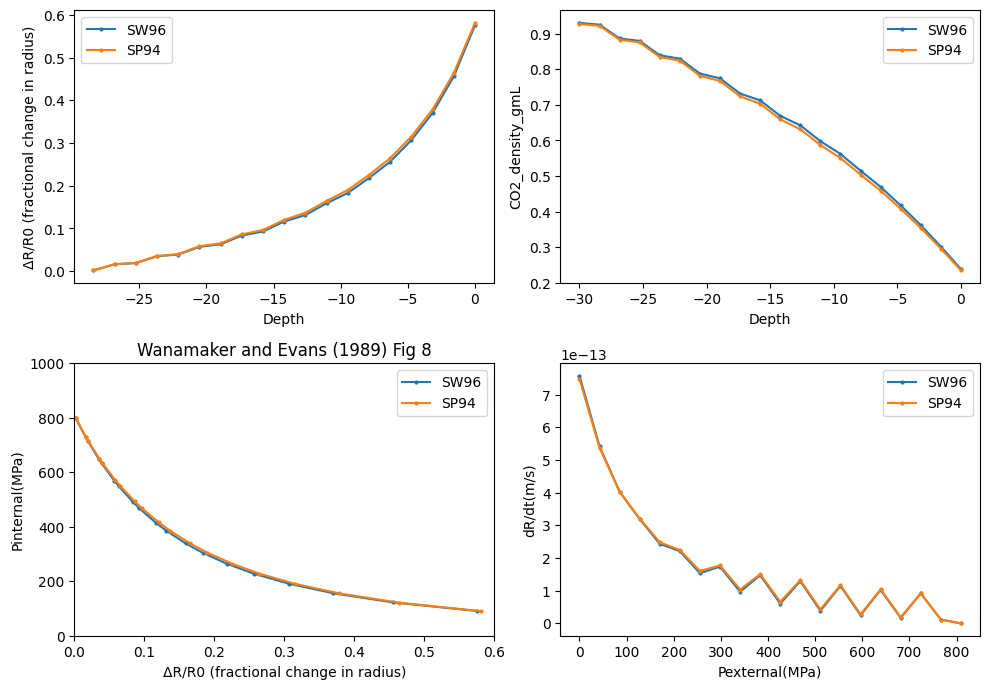

In [5]:
## Let's set the initial conditions
T = 1400 + 273.15  # Temperature in Kelvin

# Radius in m and ascent rate in m/s
R0 = 1 * 10**-6  # Initial value of R (radius of the FI in m)
b=1000*R0 # distance to the crystal edge, Wanamaker uses R0/b=1/1000
ascent_rate_ms=0.01 #m/s

depth_path_ini_fin_step=[30,0,20] #This defines the starting depth, ending depth and the number of steps in the path. 
crustal_model_config=relax.config_crustalmodel(crust_dens_kgm3=2750)#the configuration of your crustal model

EOS='SW96' # Equation of state for CO2 (SW96 or SP94)
plotfig=False # Whether to plot the figure or not

resultsSW96 = relax.stretch_in_ascent(R=R0, b=b,T=T,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS='SW96',plotfig=plotfig)
resultsSP94 = relax.stretch_in_ascent(R=R0, b=b,T=T,ascent_rate_ms=ascent_rate_ms,crustal_model_config=crustal_model_config,
                                                 depth_path_ini_fin_step=depth_path_ini_fin_step,EOS='SP94',plotfig=plotfig)

display(resultsSP94)
display(resultsSW96)
# NOW PLOT - This is the configuration of the plots, can modify x and y vars under 'keys', the first is x the second y

subplot_data = [
    {'data': [resultsSW96, resultsSP94], 'keys': [('Depth(km)', '\u0394R/R0 (fractional change in radius)')], 'xlabel': 'Depth', 'ylabel': '\u0394R/R0 (fractional change in radius)', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('Depth(km)', 'CO2_dens_gcm3')], 'xlabel': 'Depth', 'ylabel': 'CO2_density_gmL', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('\u0394R/R0 (fractional change in radius)', 'Pinternal(MPa)')], 'xlabel': '\u0394R/R0 (fractional change in radius)', 'ylabel': 'Pinternal(MPa)', 'legend': True},
    {'data': [resultsSW96, resultsSP94], 'keys': [('Pexternal(MPa)', 'dR/dt(m/s)')], 'xlabel': 'Pexternal(MPa)', 'ylabel': 'dR/dt(m/s)', 'legend': True}
]

# Make plots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
axs = axs.flatten()

for ax, subplot in zip(axs, subplot_data):
    for data, label in zip(subplot['data'], ['SW96', 'SP94']):
        for x_key, y_key in subplot['keys']:
            if x_key=='Depth(km)':
                ax.plot(-data[x_key], data[y_key], marker='o', markersize=2, label=label)
            else:
                ax.plot(data[x_key], data[y_key], marker='o', markersize=2, label=label)               
    ax.set_xlabel(subplot['xlabel'])
    ax.set_ylabel(subplot['ylabel'])
    if subplot.get('legend', False):
        ax.legend()
axs[2].set_title("Wanamaker and Evans (1989) Fig 8")
axs[2].set_xlim(0, 0.6)
axs[2].set_ylim(0, 1000)
plt.tight_layout()
plt.show()

## We can also model the stretching of an FI at constant external Pressure (i.e., during storage or quenching)

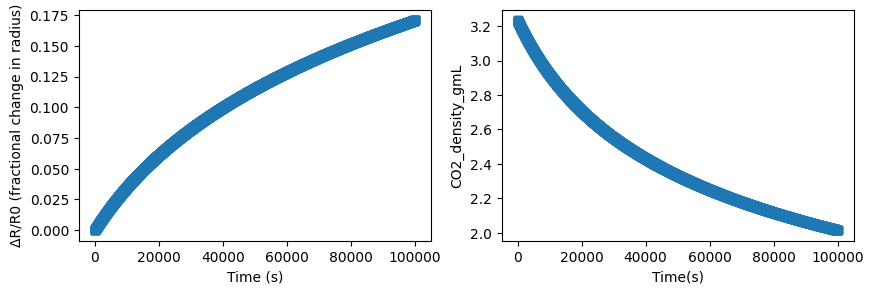

,Time(s),Step,dt(s),Pexternal(MPa),Pinternal(MPa),dR/dt(m/s),Fi_radius(μm),b (distance to xtal rim -μm),ΔR/R0 (fractional change in radius),CO2_dens_gcm3
0,0,0,0,0,900.000000,4.153999e-12,1.000000,1000.0,0.000000,3.233977
1,20,1,20,0,899.775721,4.153999e-12,1.000083,1000.0,0.000083,3.233171
2,40,2,20,0,899.551699,4.150621e-12,1.000166,1000.0,0.000166,3.232366
3,60,3,20,0,899.327934,4.147250e-12,1.000249,1000.0,0.000249,3.231562
4,80,4,20,0,899.104424,4.143884e-12,1.000332,1000.0,0.000332,3.230759
...,...,...,...,...,...,...,...,...,...,...
4995,99900,4995,20,0,560.881724,8.878669e-13,1.170731,1000.0,0.170731,2.015420
4996,99920,4996,20,0,560.856207,8.877351e-13,1.170749,1000.0,0.170749,2.015329
4997,99940,4997,20,0,560.830695,8.876033e-13,1.170766,1000.0,0.170766,2.015237
4998,99960,4998,20,0,560.805188,8.874716e-13,1.170784,1000.0,0.170784,2.015145


In [6]:
import RelaxiFI as relax
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

T=1200+273.15
Pinternal=900
Pexternal=0

R0 = 1.0*10**-6  # Initial value of R
b = R0 * 1000  # Value of b
steps = 5000  # Number of steps to iterate
totaltime = 100000

EOS='ideal'
method='Euler'
plotfig=True

solution = relax.stretch_at_constant_Pext(R=R0, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal, 
                                        totaltime=totaltime, steps=steps, EOS=EOS,method=method,
                                        plotfig=plotfig)
solution

## Example, Fig 3 from Wanamaker and Evans 1989

KeyboardInterrupt: 

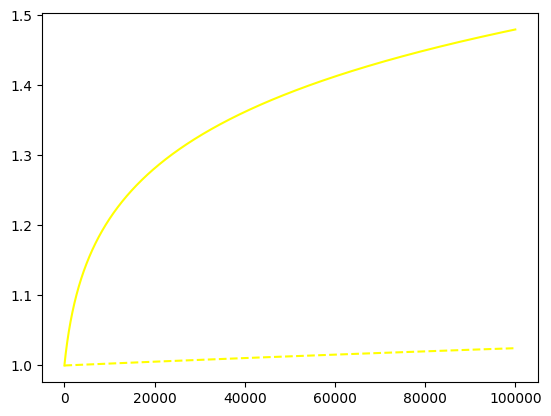

In [7]:
T_list = [1300,1350,1400]
temperatures=[t + 273.15 for t in T_list]

Pinternal_values = [900, 200]
Pexternal=0
dataframes = {}

R0 = 1.0e-6  # Initial value of R
b = R0 * 1000  # Value of b
steps = 5000  # Number of steps to iterate
totaltime = 100000

EOS='ideal'
method='Euler'
plotfig=False


for temperature in temperatures:
    for Pinternal in Pinternal_values:
        T = temperature
        solution = relax.stretch_at_constant_Pext(R=R0, b=b, T=T, Pinternal=Pinternal, Pexternal=Pexternal, 
                                              totaltime=totaltime, steps=steps, EOS=EOS,method=method,
                                              plotfig=plotfig)
        key = f"T={temperature-273.15}°C, Pi={Pinternal}"
        dataframes[key] = solution

        if 'T=1300' in key:
            color='yellow'
        if 'T=1350' in key:
            color='orange'
        if 'T=1400' in key:
            color='red'
        if 'Pi=900' in key:
            linestyle='-'
        if 'Pi=200' in key:
            linestyle='--'

        plt.plot(solution['Time(s)'], solution['Fi_radius(μm)'], label=key,color=color,linestyle=linestyle)

plt.xlabel('Time (s)')
plt.ylabel('FI_radius (μm)')
plt.title("Wanamaker and Evans Figure 3")
plt.ylim([1,2.2])
plt.legend()
plt.show()


## We can then build custom system models as we want
- For example here, we model the eruption of an FI of radius 2.5 um trapped at South Caldera Reservoir (Kilaeua) that is stored at Hale'mau'mau reservoir for 10 days

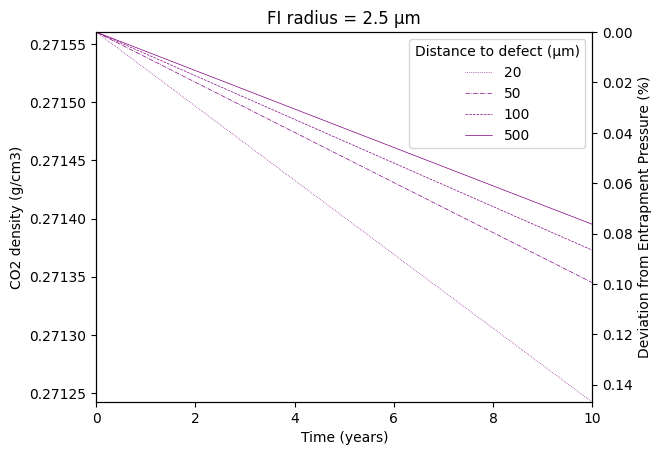

In [ ]:
####### Establish reservoir PTX conditions
## FI radius
R0 = 2.5 * 10 ** -6 # FI radius in m

## Crustal model configuration
config=relax.config_crustalmodel(crust_dens_kgm3=2750) # You can adjust as you want just call help for details

## Trapping reservoir conditions
Trapping_temp=1300
Trapping_pressure = 1 # in kbar

## surface conditions
Storage_temp=1150  # T in C
Storage_pressure = 0.001 # in kbar

####### Let's start our model

### First let's calculate the CO2 density 
fi_rho_initial_gcm3=relax.calculate_rho_for_P_T(EOS='SW96',P_kbar=Trapping_pressure,T_K=Trapping_temp+273.15)[0]

## Now we move the FI to HM reservoir
fi_Pi_storage_initial_MPa=relax.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=fi_rho_initial_gcm3,T_K=Storage_temp+273.15)['P_MPa'][0]

## Now let's leave it at HM for 10 days
days=10

## Choose equation of state, numerical method and distances to crytal defects

EOS='SW96' # Equation of state for CO2, option SW96, SP94 or ideal

method='RK1' # this is the numerical solver, options are RK1, RK2, RK3 and RK4 (Runge-Kutta)
steps=1000 #number of steps, more is better but slower

dist2defect_list=[20,50,100,500] # Distances to crystal defect structures in microns

T = Storage_temp + 273.15 # T in Kelvin for the model
Pinternal=fi_Pi_storage_initial_MPa
Pexternal=Storage_pressure*100 ##Pressure in MPa for this model

day_in_sec=(24*60*60)
totaltime=days*day_in_sec

## This calculates bvalues for the distances to defect you choose
def calc_multiplier(R0, dist2defect_um):
    multiplier = (dist2defect_um) / (R0 * 10**6)
    return multiplier

R_values = [R0]  # Define R values
b_values= [calc_multiplier(R0, dist)*R0 for dist in dist2defect_list]


# Call the function with appropriate arguments

results_dict_surface = relax.loop_R_b_constant_Pext(R_values=R_values, b_values=b_values, T=T, EOS=EOS, Pinternal=Pinternal, Pexternal=Pexternal, 
                                                    totaltime=totaltime, steps=steps, T4endcalc_PD=Trapping_temp,method=method,
                                              plotfig=False,config=config)


################## Now let's plot our results ######################

# Define some constants and variables
linecolor = 'darkred'
linecolor2 = 'orange'
seconds_in_e_year = 365.25 * 24 * 60 * 60
y_col = 'CO2_dens_gcm3'
x_col = 'Time(s)'
twin_col = 'Calculated depths (km)_TrappingT'
xlabel4plot = 'Time(years)'
ylabel4plot = 'CO2 density (g/cm3)'
twinlabel4plot = 'Calculated depth (km)_TrappingT'
linecolor = 'midnightblue'
linecolor2 = 'purple'
linewidth = 0.5

# Create a figure and axes
fig, ax = plt.subplots()

# Plot the data on the primary y-axis


ax.plot(results_dict_surface['R0']['b0'][x_col] / day_in_sec, results_dict_surface['R0']['b0'][y_col], color=linecolor2, linestyle=':', linewidth=linewidth, label=str(round(b_values[0] * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b1'][x_col] / day_in_sec, results_dict_surface['R0']['b1'][y_col], color=linecolor2, linestyle='-.', linewidth=linewidth, label=str(round(b_values[1] * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b2'][x_col] / day_in_sec, results_dict_surface['R0']['b2'][y_col], color=linecolor2, linestyle='--', linewidth=linewidth, label=str(round(b_values[2] * 10 ** 6)))
ax.plot(results_dict_surface['R0']['b3'][x_col] / day_in_sec, results_dict_surface['R0']['b3'][y_col], color=linecolor2, linestyle='-', linewidth=linewidth, label=str(round(b_values[3] * 10 ** 6)))
ax2 = ax.twinx()

xlim_F=([round(min(results_dict_surface['R0']['b0'][x_col]/day_in_sec)),round(max(results_dict_surface['R0']['b0'][x_col]/day_in_sec))])
ymin_F=np.nanmin([np.nanmin(results_dict_surface['R0']['b0'][y_col])])

ylim_F=[ymin_F,fi_rho_initial_gcm3]

ylim_P_F=relax.calculate_P_for_rho_T(EOS='SW96',CO2_dens_gcm3=pd.Series(ylim_F),T_K=Trapping_temp+273.15)['P_MPa']

ylim_D_F=relax.convert_pressure_to_depth(P_kbar=ylim_P_F/100,
                model='ryan_lerner')



def percent_drop(ylim, original_value):
    return 100-ylim*100/original_value



ax.set_xlim(xlim_F)
ax.set_ylim(ylim_F)
ax2.set_ylim(percent_drop(ylim_P_F,original_value=Trapping_pressure*100))

# Customize axis labels and legends
ax.set_title(f"FI radius = {round(R_values[0]*10**6,1)} μm")
ax.set_xlabel('Time (years)')
ax.set_ylabel(ylabel4plot)
ax2.set_ylabel('Deviation from Entrapment Pressure (%)')

ax.legend(title='Distance to defect (μm)')

